**Econ 353: Money, Banking and Financial Institutions**  

**Project 1 on Time-Series Analysis**  

We are using the daily closing prices of Google

Dat source: https://finance.yahoo.com/quote/GOOG/history?p=GOOG



**<span style="color:red;">Objective of the Project:</span>**  

1) Upload a Time-series data set  
2) Visualize the data and report what you find - is there a trend or sesaonal component to it  
3) Check the stationarity of the data and report results  
4) If the data has trend and /or seasonality, decompose the data into trend and/or seasonal component 
5) Visualize the components of the data
6) If the data has trend then de-trend the data
7) If the data has seasonal component then de-seasonalize the data
8) Visualize the de-seasonalized /de-trended data
9) Check stationarity of de-trended data and report results. Make sure the series the stationary before further analysis
10) Forecast using ARIMA modelling
11) Visualize the Forecast

The Notebook below is divided into 11 sections above each section how to complete each analysis, respectively. 


**<span style="color:red;">Apart from completing the code and answering questions following the analysis highlighted in markdown at various places, please also answer the questions in the pdf file outline instructions for the Project</span>**  

**<span style="color:red;">install necessary libraries if not installed</span>**  

In [1]:
#pip install pmdarima

You need to import certain libraries in python whioch you will require for plotting

In [2]:
# Import necessary libraries
import pandas as pd #Pandas is a popular data manipulation and analysis library for the Python programming language. It provides data structures for efficiently storing, analysing and manipulating large datasets
import numpy as np #NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # This library is used for plotting
from statsmodels.tsa.stattools import adfuller # this is for ststitical tests like carrying out unit root test, among others
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima # this is for ARIMA forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
# Load your time series data (replace 'your_data.csv' with your actual file or data source)
df =                  # write the code for importing Google stock prices file - Name of the file is "Google.csv"

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Convert 'Value' to numeric format
#df['Prices'] = df['Prices'].str.replace(',', '').astype(int)

# Set 'Date' as the index - Complete the code below 


In [8]:
#print the dataframe




                 Close
Date                  
2023-02-13   95.000000
2023-02-14   94.949997
2023-02-15   97.099998
2023-02-16   95.779999
2023-02-17   94.589996
...                ...
2024-02-05  144.929993
2024-02-06  145.410004
2024-02-07  146.679993
2024-02-08  147.220001
2024-02-09  150.220001

[250 rows x 1 columns]


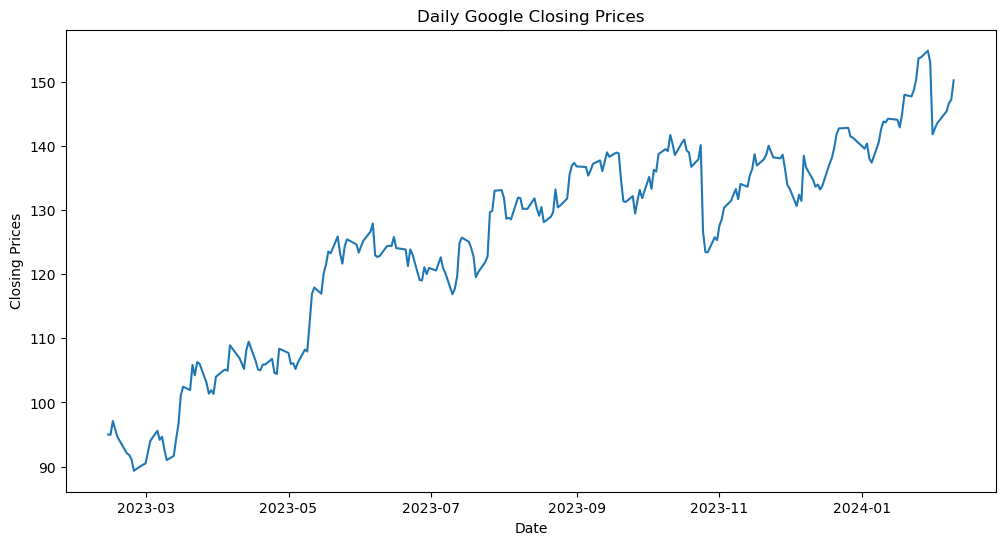

In [10]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
                              #Complete the code for visualizing the series
plt.title('Daily Google Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

Explain what you see in the series? Trend, seasonality or both and why?

The Augmented Dickey-Fuller (ADF) test is a statistical test for stationarity. The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series has a unit root, which indicates non-stationarity. The alternative hypothesis is that the time series is stationary.

In [11]:
# Check for stationarity
def stationarity_test(timeseries):
                                     #Write the code for adf test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
stationarity_test(df['Close'])

ADF Statistic: -1.3525954117430947
p-value: 0.6047798865759635
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


Interpret the results that you get



The seasonal_decompose function in statsmodels allows you to decompose a time series into its trend, seasonal, and residual components. The period parameter represents the number of observations per seasonal cycle.

In my case, since the data appears to be monthly, we can set the period parameter to 12 because there are 12 months in a year. If our data has a different frequency, adjust the period accordingly.

In [12]:
# De-compose for trend, seasonality, and residual
decomposition =               #Complete the code for decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

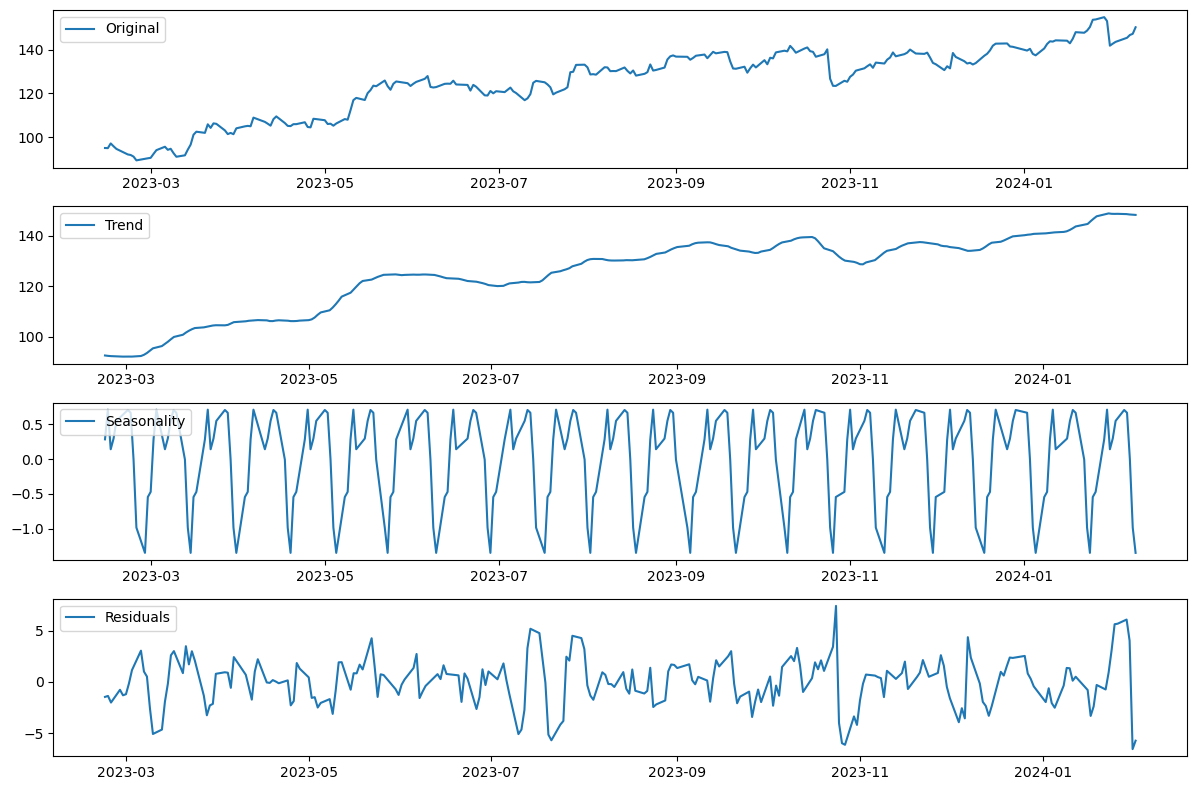

In [13]:
# Visualize components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [14]:
# De-trend by subtracting trend
detrended =                        #Complete the code for creating detrended data



In [15]:
# De-seasonalize by subtracting seasonal component
deseasonalized =        # #Complete the code for creating deseasonalized data



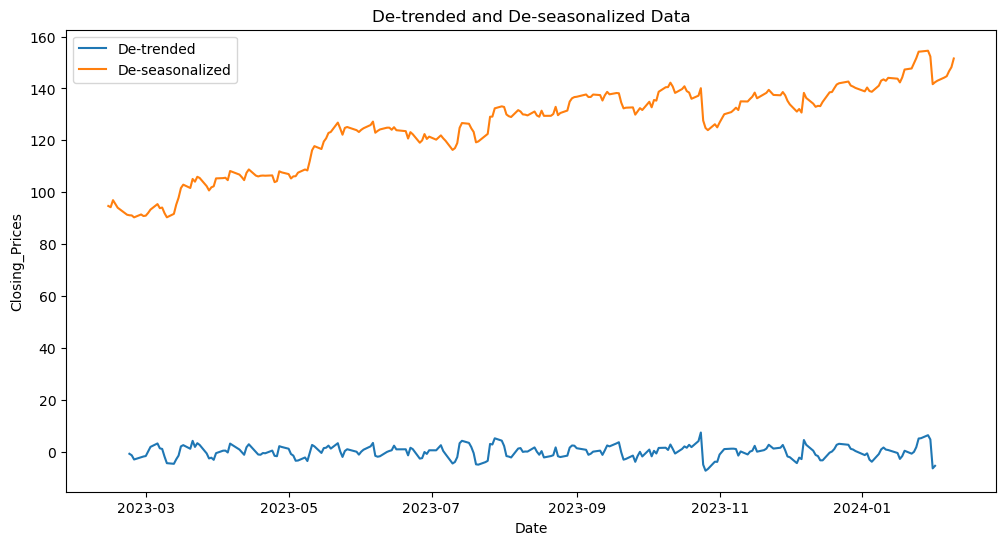

In [16]:
# Visualize de-trended and de-seasonalized data
plt.figure(figsize=(12, 6))
plt.plot(detrended, label='De-trended')
plt.plot(deseasonalized, label='De-seasonalized')
plt.legend(loc='upper left')
plt.title('De-trended and De-seasonalized Data')
plt.xlabel('Date')
plt.ylabel('Closing_Prices')
plt.show()



In [17]:
# Check stationarity of de-seasonalized data #complete the code for printing stationary test for de-sesonalized data
 



ADF Statistic: -1.3525954117430947
p-value: 0.6047798865759635
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


In [18]:
# Check stationarity of de-trended data
stationarity_test(detrended.dropna())


ADF Statistic: -1.3525954117430947
p-value: 0.6047798865759635
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


Explain what you find

Log Transformation:

Apply a logarithmic transformation to stabilize variance 

In [19]:
df['Prices_log'] =                 #transform the data - take log of stock prices: complete the code


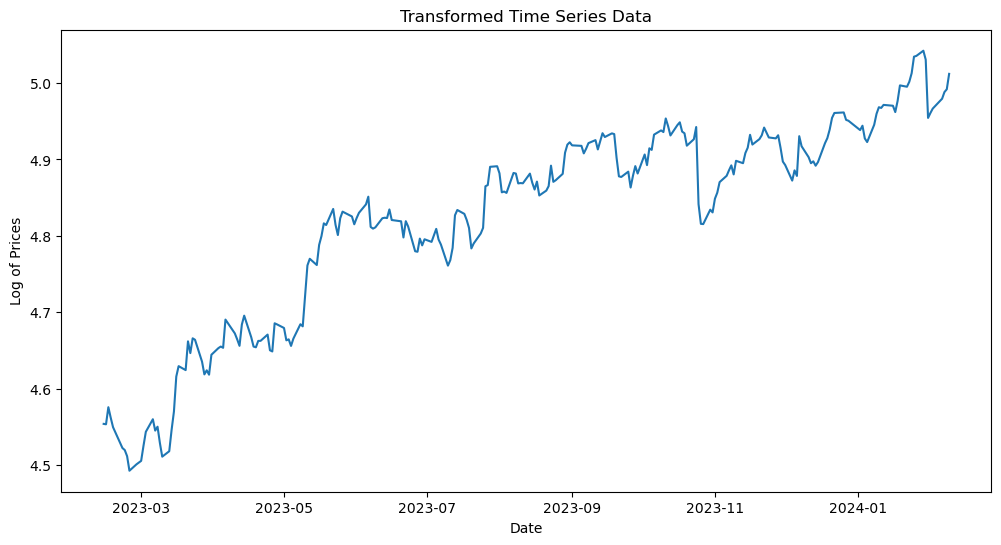

In [20]:
# Visualize the logged time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices_log'])
plt.title('Transformed Time Series Data')
plt.xlabel('Date')
plt.ylabel('Log of Prices')
plt.show()

First-differencing data

In [21]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])



In [22]:
df['Prices_log'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Prices_log'].dropna(inplace=True)


In [23]:
# Check stationarity of logged data - complete the code AND EXPLAIN YOUR RESULTS


ADF Statistic: -1.5087407781605549
p-value: 0.5291830547583258
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


EXPLAIN WHAT YOU FIND

In [24]:
df['Prices_log_diff'] =                                #Transform the data- take first difference

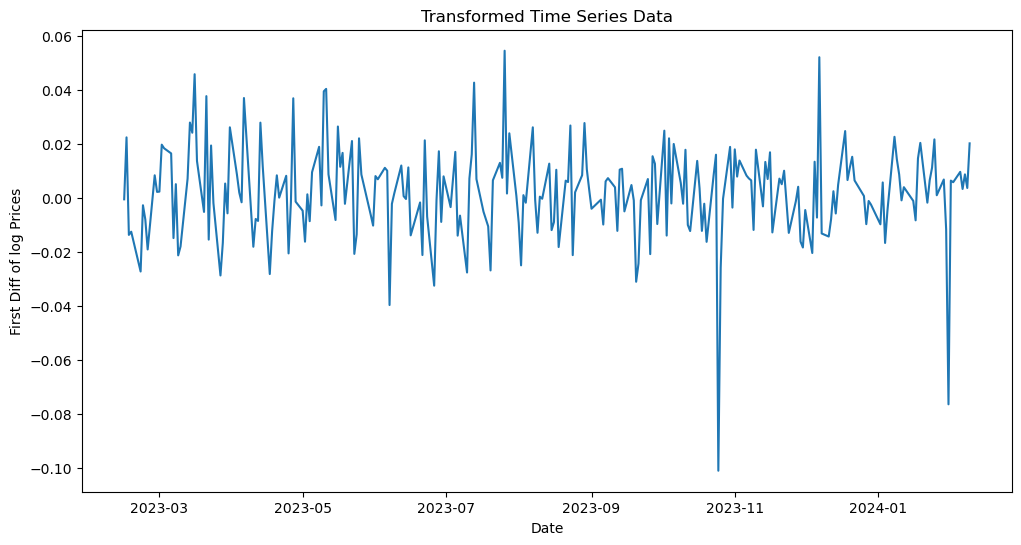

In [25]:
# Visualize the logged time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices_log_diff'])
plt.title('Transformed Time Series Data')
plt.xlabel('Date')
plt.ylabel('First Diff of log Prices')
plt.show()

In [26]:
# Check stationarity of differenced data
stationarity_test(df['Prices_log_diff'].dropna())


ADF Statistic: -14.627145642658144
p-value: 3.8028609413514155e-27
Critical Values: {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}


The updated ADF test results are as follows: EXPLAIN YOUR RESULTS ABOVE. Explain the results. Can we proceed with arima foreasting?



In [27]:
df['Prices_log_diff']

Date
2023-02-13         NaN
2023-02-14   -0.000526
2023-02-15    0.022391
2023-02-16   -0.013687
2023-02-17   -0.012502
                ...   
2024-02-05    0.009637
2024-02-06    0.003307
2024-02-07    0.008696
2024-02-08    0.003675
2024-02-09    0.020173
Name: Prices_log_diff, Length: 250, dtype: float64

In [28]:
#You can check if a time series has NaN values using the isna() or isnull() method in Pandas. Here's an example:


has_nan = df['Prices_log_diff'].isna().any()

if has_nan:
    print("The 'Prices_log_diff' series has NaN values.")
else:
    print("The 'Prices_log_diff' series does not have NaN values.")


The 'Prices_log_diff' series has NaN values.


In the provided code below, the auto_arima function from the pmdarima library is used to automatically find the best ARIMA model (p, d, q) for your time series data. This function performs a grid search over multiple combinations of p, d, and q values and selects the model with the lowest Akaike Information Criterion (AIC).

In [29]:
import pandas as pd
from pmdarima import auto_arima


# Fill NaN values with the mean of the column
df['Prices_log_diff'].fillna(df['Prices_log_diff'].mean(), inplace=True)



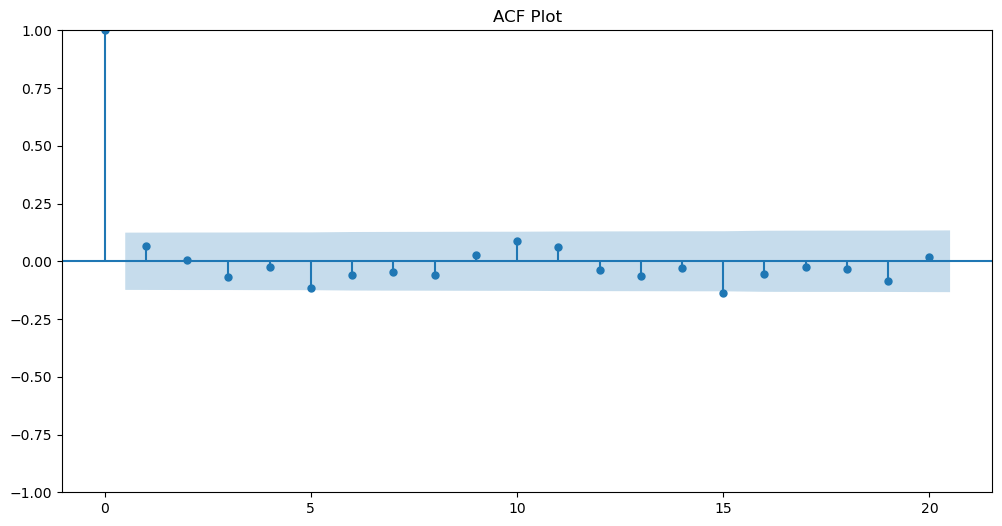

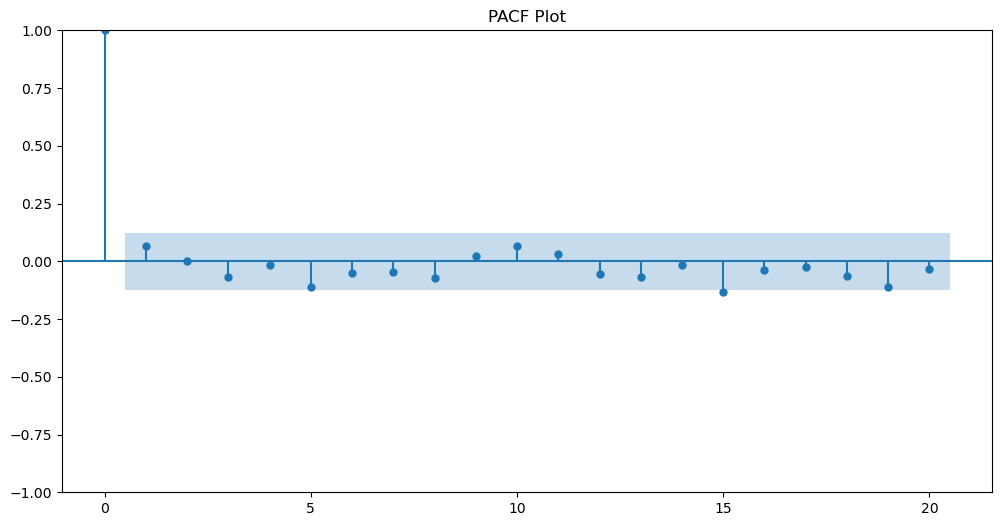

In [30]:
# ACF and PACF plots for determining ARIMA orders
 #Complete the code for ACF and PACF PLOT and explain what you find in markdown below the plot
    
    
    
    
    

Fitting arima model (Method 1)

(0, 0, 0)
(0, 0, 0, 12)


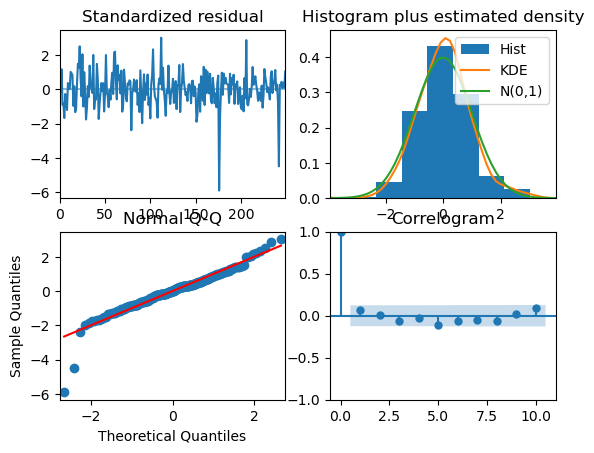

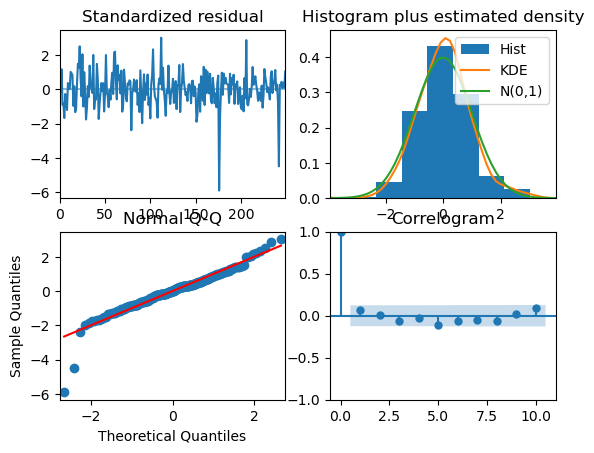

In [98]:
from pmdarima import auto_arima
import pandas as pd

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Perform a grid search for the best ARIMA model on series "Prices_log_diff". Complete the code below:
model = 

# Display the best model's parameters
print(model.order)


# Fit the best model to the data 
model.fit(df['Prices_log_diff'])

#and Print the summary and diagnostic - Complete the two lines of code below for printing model summary and model diagnostics
#Explain what you find in markdown below the model fit and model diagnostics

EXPLAIN THE MODEL RESULTS ABOVE

In [120]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Assuming Prices_log_diff and model are already defined


# In-sample forecasting
in_sample_forecast = model.predict_in_sample()

# Reverse differencing and log transformations for in-sample forecast
in_sample_forecast_reversed = np.cumsum(in_sample_forecast)
in_sample_forecast_reversed = np.exp(in_sample_forecast_reversed)
in_sample_forecast_reversed = df['Close'].iloc[0] * in_sample_forecast_reversed

# Out-of-sample forecasting
# Assuming you have future data in a DataFrame called df_future
n_periods = 20
forecast, conf_int =      (steps=n_periods, return_conf_int=True)#complete the code


# Reverse differencing and log transformations for out-of-sample forecast
forecast_reversed = np.cumsum(forecast)
forecast_reversed = np.exp(forecast_reversed)
forecast_reversed = df['Close'].iloc[-1] * forecast_reversed

# Reverse differencing and log transformations for confidence intervals
conf_int_reversed = np.cumsum(conf_int, axis=1)
conf_int_reversed = np.exp(conf_int_reversed)
conf_int_reversed = df['Close'].iloc[-1] * conf_int_reversed
# Print or use the forecasts as needed
print("In-sample forecast:")
print(in_sample_forecast_reversed)

print("\nOut-of-sample forecast:")
print(forecast_reversed)


In-sample forecast:
Date
2023-02-13     95.174985
2023-02-14     95.350293
2023-02-15     95.525924
2023-02-16     95.701878
2023-02-17     95.878156
                 ...    
2024-02-05    149.392956
2024-02-06    149.668130
2024-02-07    149.943812
2024-02-08    150.220001
2024-02-09    150.496699
Name: predicted_mean, Length: 250, dtype: float64

Out-of-sample forecast:
250    150.496699
251    150.773907
252    151.051625
253    151.329854
254    151.608597
255    151.887852
256    152.167622
257    152.447908
258    152.728709
259    153.010028
dtype: float64


/Users/kaushikisingh/anaconda3/envs/Kaushiki/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kaushikisingh/anaconda3/envs/Kaushiki/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/Users/kaushikisingh/anaconda3/envs/Kaushiki/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kaushikisingh/anaconda3/envs/Kaushiki/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'SARIMAX Forecasting for google Stocks')

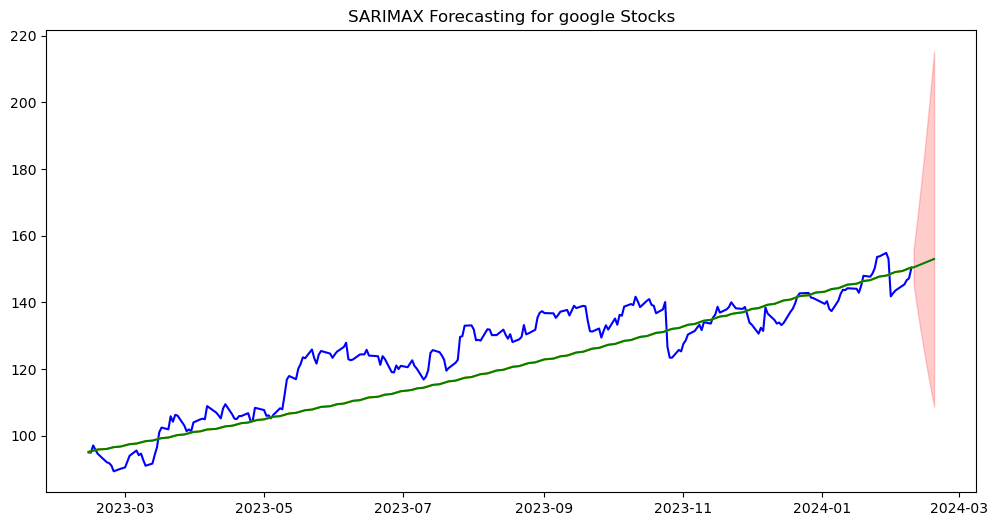

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming df is your time series dataframe with a datetime index and 'Close' column
# Assuming Prices_log_diff and model are already defined

# Fit the best model to the data
model.fit(df['Prices_log_diff'])

# In-sample forecasting
in_sample_forecast = model.predict_in_sample()

# Reverse differencing and log transformations for in-sample forecast
in_sample_forecast_reversed = np.cumsum(in_sample_forecast)
in_sample_forecast_reversed = np.exp(in_sample_forecast_reversed)
in_sample_forecast_reversed = df['Close'].iloc[0] * in_sample_forecast_reversed

# Out-of-sample forecasting
# Assuming you have future data in a DataFrame called df_future
n_periods = 10
forecast, conf_int =  (steps=n_periods, return_conf_int=True) (steps=n_periods, return_conf_int=True)#complete the code

# Reverse differencing and log transformations for out-of-sample forecast
forecast_reversed = np.cumsum(forecast)
forecast_reversed = np.exp(forecast_reversed)
forecast_reversed = df['Close'].iloc[-1] * forecast_reversed

# Reverse differencing and log transformations for confidence intervals
conf_int_reversed = np.cumsum(conf_int, axis=1)
conf_int_reversed = np.exp(conf_int_reversed)
conf_int_reversed = df['Close'].iloc[-1] * conf_int_reversed

# Make as pandas series
fc_series = pd.Series(forecast_reversed, index=future_dates)
lower_series = pd.Series(conf_int_reversed[:, 0], index=future_dates[:n_periods])
upper_series = pd.Series(conf_int_reversed[:, 1], index=future_dates[:n_periods])
# Plot
# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Prices', color='blue')

# Plot the in-sample forecast
plt.plot(df.index, in_sample_forecast_reversed, label='In-sample Forecast', color='orange')

# Plot the out-of-sample forecast with confidence intervals
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=n_periods, freq='D')
all_dates = np.concatenate([df.index, future_dates])
all_forecasts = np.concatenate([in_sample_forecast_reversed, forecast_reversed])

# Truncate the arrays to the length of the shorter one
min_length = min(len(all_dates), len(all_forecasts))
all_dates = all_dates[:min_length]
all_forecasts = all_forecasts[:min_length]




#COMPLETE THE CODE FOR PLOTTING THE FORECAST






plt.title('ARIMA Forecasting for google Stocks')


EXPLAIN WHAT YOU FIND- IS YOUR FORECASTING PERFECT? IS THE MODEL YOU CHOOSE PERFECT? CAN YOU EXPLAIN WHY OR WHY NOT IT IS A PERFECT FORECAST. 

Summarize your findings